# NLP Notebook 1: Naive IMDB Classifier

In [ ]:
%matplotlib inline
import keras

## The IMDB dataset


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words)
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [ ]:
from keras.datasets import imdb

vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, len(train_data[0]), len(train_data[1])

((25000,), 218, 189)


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words).
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words. First we create a function to take the first n elements of a dictionary (for display purposes).

In [ ]:
from more_itertools import take

def dict_head(dict, n):
  return take(n, dict.items())

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
dict_head(word_index, 5), len(word_index.keys())

1654784/1641221 [==============================] - 0s 0us/step


([('fawn', 34701),
  ('tsukino', 52006),
  ('nunnery', 52007),
  ('sonja', 16816),
  ('vani', 63951)],
 88584)

#### Exercise 1
**TODO**: Reverse the dictionary content (switch keys and values) and display a review in English (instead of in numbers). Use 'xxunk' for an unknown token in the vocab.

Note: the first 3 indices in the vocab are special tokens. You need to offset your indexing by 3.

In [ ]:
reverse_word_index = #
dict_head(reverse_word_index, 5)

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani')]

In [ ]:
decoded_review = #
decoded_review

"xxunk this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert xxunk is an amazing actor and now the same being director xxunk father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for xxunk and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also xxunk to the two little boy's that played the xxunk of norman and paul they were just brilliant children are often left out of the xxunk list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what

## Preparing the data


Next we turn our lists of indices into tensors. There are two ways we could do that - we'll cover more options in more detail later on:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`,
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which we will cover in
detail later).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity.

#### Exercise 2
**TODO**: Create a one-hot encoded representation for each review in the train- and test data.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=vocab_size):
    #

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

We should also vectorize our labels, which is straightforward:

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our networks

### Feedforward


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16,
activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. What's a hidden unit? It's a dimension
in the representation space of the layer. You may remember from the previous exercise that each such `Dense` layer with a `relu` activation implements
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when
learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to choose for each layer.

Later on, you will learn formal principles to guide you in making these choices.
For the time being, you will have to trust us with the following architecture choice:
two intermediate layers with 16 hidden units each,
and a third layer which will output the scalar prediction regarding the sentiment of the current review.
The intermediate layers will use `relu` as their "activation function",
and the final layer will use a sigmoid activation so as to output a probability
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive).
A `relu` (rectified linear unit) is a function meant to zero-out negative values,
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

Here's what our network looks like:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

And here's the Keras implementation, very similar to the first MNIST example you saw previously:

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss.
It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you
are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the "distance"
between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will
also monitor accuracy during training.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

'''
or
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''

"\nor\nmodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\n              loss='binary_crossentropy',\n              metrics=['accuracy'])      \n"

### Training the model

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512
samples. At the same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing a percentage as the `validation_split` argument:

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 37ms/step - loss: 0.4810 - accuracy: 0.8128 - val_loss: 0.3452 - val_accuracy: 0.8840
Epoch 2/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2767 - accuracy: 0.9097 - val_loss: 0.3265 - val_accuracy: 0.8670
Epoch 3/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2101 - accuracy: 0.9276 - val_loss: 0.2685 - val_accuracy: 0.8948
Epoch 4/20
40/40 [==============================] - 1s 30ms/step - loss: 0.1724 - accuracy: 0.9413 - val_loss: 0.2945 - val_accuracy: 0.8844
Epoch 5/20
40/40 [==============================] - 1s 31ms/step - loss: 0.1445 - accuracy: 0.9505 - val_loss: 0.2975 - val_accuracy: 0.8846
Epoch 6/20
40/40 [==============================] - 1s 31ms/step - loss: 0.1237 - accuracy: 0.9590 - val_loss: 0.3107 - val_accuracy: 0.8860
Epoch 7/20
40/40 [==============================] - 1s 30ms/step - loss: 0.1063 - accuracy: 0.9654 - val_loss: 0.3204 - val_accuracy: 0.8846
Epoch 8/20
40

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause
as the model computes its loss and accuracy on the 10,000 samples of the validation data.



In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the
training and validation loss side by side, as well as the training and validation accuracy:

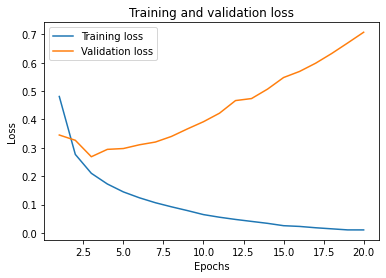

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

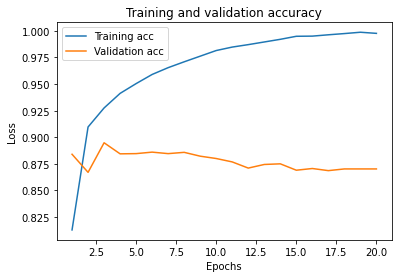

In [ ]:
plt.clf()   # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Our fairly naive approach achieves an accuracy of around 87%. With state-of-the-art approaches, one should be able to get close to 95%.

### Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive
by using the `predict` method:

In [ ]:
model.predict(x_test)

array([[0.04039168],
       [1.        ],
       [0.7644507 ],
       ...,
       [0.02527058],
       [0.00225222],
       [0.07414556]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).


### Embeddings

#### Exercise 3

**TODO**: So far, we've been using one-hot encoded vectors to represent our text. Try to use an embedding layer instead. Check the keras documentation for the specifics of an embedding layer.

All of our reviews have different lengths, and the longest of the bunch is 2494 words long. In order to not have to wait forever, we will limit our maximum review size to 500.

In [ ]:
max([len(x) for x in train_data])

2494

In [ ]:
from keras.preprocessing import sequence

maxlen = 500

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(train_data, maxlen=maxlen)
input_test = sequence.pad_sequences(test_data, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense, Embedding
from keras.models import Sequential

# start with a small embedding size if you don't want to wait 17 years
embedding_size = 32

model = models.Sequential()
model.add()

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 6s 130ms/step - loss: 0.6921 - accuracy: 0.5144 - val_loss: 0.6909 - val_accuracy: 0.5199
Epoch 2/20
40/40 [==============================] - 5s 126ms/step - loss: 0.6898 - accuracy: 0.5252 - val_loss: 0.6890 - val_accuracy: 0.5237
Epoch 3/20
40/40 [==============================] - 5s 128ms/step - loss: 0.6882 - accuracy: 0.5238 - val_loss: 0.6891 - val_accuracy: 0.5183
Epoch 4/20
40/40 [==============================] - 5s 129ms/step - loss: 0.6874 - accuracy: 0.5213 - val_loss: 0.6875 - val_accuracy: 0.5237
Epoch 5/20
40/40 [==============================] - 5s 127ms/step - loss: 0.6868 - accuracy: 0.5251 - val_loss: 0.6877 - val_accuracy: 0.5227
Epoch 6/20
40/40 [==============================] - 5s 126ms/step - loss: 0.6867 - accuracy: 0.5260 - val_loss: 0.6871 - val_accuracy: 0.5249
Epoch 7/20
40/40 [==============================] - 5s 126ms/step - loss: 0.6864 - accuracy: 0.5239 - val_loss: 0.6873 - val_accuracy: 0.5257
Epoch 

### Recurrent Neural Network

Now we're going to use a recurrent neural network (RNN) for this task. An RNN can handle input sequences of arbitrary length and is good for tasks where the history of a sequence needs to be remembered. For this "simple" classification task it will most probably fall short of the performance of our simple linear neural network above, but when we will be using language models, some kind of recurrent neural network will be our best choice.

RNNs will be further developed in the coming classes.

#### Exercise 4

**TODO**: use the SimpleRNN layer to add a recurring neural network to our model. As in the previous model, start with an embedding layer. Then train the network.

In [ ]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

embedding_size = 32

model = Sequential()
model.add(...)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 15s 349ms/step - loss: 0.6842 - accuracy: 0.5548 - val_loss: 0.6660 - val_accuracy: 0.5922
Epoch 2/10
40/40 [==============================] - 14s 346ms/step - loss: 0.5610 - accuracy: 0.7552 - val_loss: 0.5856 - val_accuracy: 0.6890
Epoch 3/10
40/40 [==============================] - 14s 341ms/step - loss: 0.4312 - accuracy: 0.8288 - val_loss: 0.5285 - val_accuracy: 0.7382
Epoch 4/10
40/40 [==============================] - 13s 336ms/step - loss: 0.3673 - accuracy: 0.8505 - val_loss: 0.3765 - val_accuracy: 0.8456
Epoch 5/10
40/40 [==============================] - 14s 344ms/step - loss: 0.2907 - accuracy: 0.8905 - val_loss: 0.4854 - val_accuracy: 0.7864
Epoch 6/10
40/40 [==============================] - 14s 339ms/step - loss: 0.2495 - accuracy: 0.9056 - val_loss: 0.4130 - val_accuracy: 0.8146
Epoch 7/10
40/40 [==============================] - 14s 344ms/step - loss: 0.1990 - accuracy: 0.9302 - val_loss: 0.3825 - val_accuracy: 0.8408

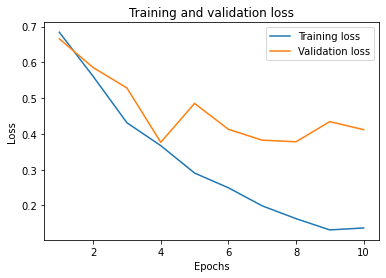

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

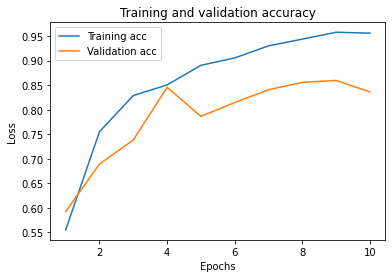

In [ ]:
plt.clf()   # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As a reminder, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is
that our inputs only consider the first 500 words rather the full sequences --
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text.

#### Exercise 5
**TODO**: Use pretrained word embeddings to optimize your model even further.

#### Exercise 6

Come up with other ways of solving the problem. You are free to use whatever you like:
* Other optimizations or embeddings
* LSTMs
* Transfer Learning with HuggingFace Transformers
* LLMs